In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
artists = pd.read_csv('artists_clean.csv')
artists.head()

,id,name,url,summary,picture,birthplace,deathplace,birthdate,deathdate,cause_of_death
0,0,Vincent Van Gogh,http://wikigallery.org/wiki/artist36933/Vincen...,Vincent Willem van Gogh (Dutch: [ˈvɪnsɛnt ˈʋɪl...,0.0,0.0,342.0,1853-03-30,1890-07-29,Gunshot wound
1,1,Pierre Auguste Renoir,http://wikigallery.org/wiki/artist39254/Pierre...,Pierre-Auguste Renoir (French: [pjɛʁ oɡyst ʁən...,1.0,1.0,343.0,1841-02-25,1919-12-03,NaN
2,2,Claude Oscar Monet,http://wikigallery.org/wiki/artist39249/Claude...,"Oscar-Claude Monet (UK: , US: , French: [klod ...",2.0,2.0,344.0,1840-11-14,1926-12-05,NaN
3,3,Fernando Botero,http://wikigallery.org/wiki/artist37052/Fernan...,Fernando Botero Angulo (born 19 April 1932) is...,3.0,3.0,NaN,1932-04-19,NaN,NaN
4,4,Jean-Léon Gérôme,http://wikigallery.org/wiki/artist46453/Jean-L...,Jean-Léon Gérôme (11 May 1824 – 10 January 190...,4.0,4.0,2.0,1824-05-11,1904-01-10,NaN


In [9]:
# Select all artists that have death date as NaN
artists_alive = artists[artists['birthdate'].notna() & artists['deathdate'].isna()]
print("Potentially alive: " + str(artists_alive.shape))
# Select all artists that have 'deathdate' different from NaN
artists_dead = artists[artists['deathdate'].notna() & artists['deathdate'].notna()]
print("Potentially dead: " + str(artists_dead.shape))

Potentially alive: (28, 10)
Potentially dead: (348, 10)


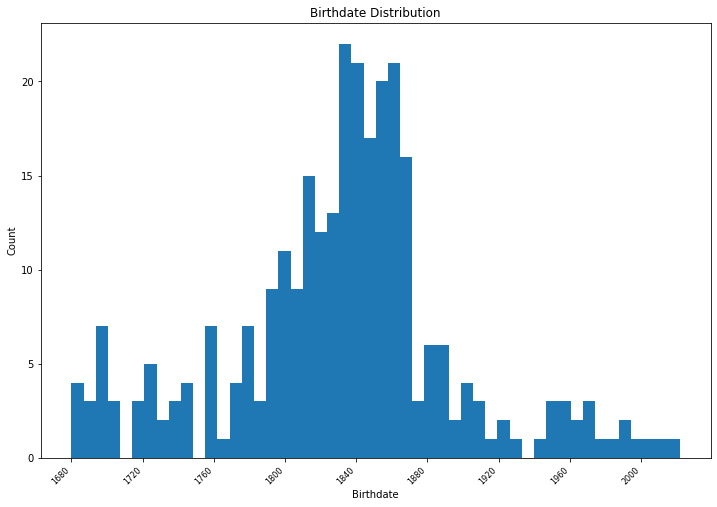

In [14]:
df = artists.copy()
# convert birthdate column to datetime
df['birthdate'] = pd.to_datetime(df['birthdate'], errors='coerce')

# extract year from birthdate column
df['birthyear'] = df['birthdate'].dt.year

plt.figure(figsize=(12,8))
plt.hist(df['birthdate'], bins=50)
plt.title('Birthdate Distribution')
plt.xlabel('Birthdate')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.show()

In [15]:
places = pd.read_parquet('https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/data/Places.parquet.gzip')
places.head(2)

,id,name,parent
0,0,Zundert,213.0
1,1,Limoges,214.0


In [26]:
# Join artists and places
artists_places = pd.merge(artists, places, left_on='birthplace', right_on='id', how='left')

# join artists_places with places again but now on parent key
artists_places = pd.merge(artists_places, places, left_on='parent', right_on='id', how='left')
artists_places[['name_x', 'birthplace', 'id_y', 'name_y', 'parent_x', 'id', 'name']].head(2)

,name_x,birthplace,id_y,name_y,parent_x,id,name
0,Vincent Van Gogh,0.0,0.0,Zundert,213.0,213.0,Netherlands
1,Pierre Auguste Renoir,1.0,1.0,Limoges,214.0,214.0,France


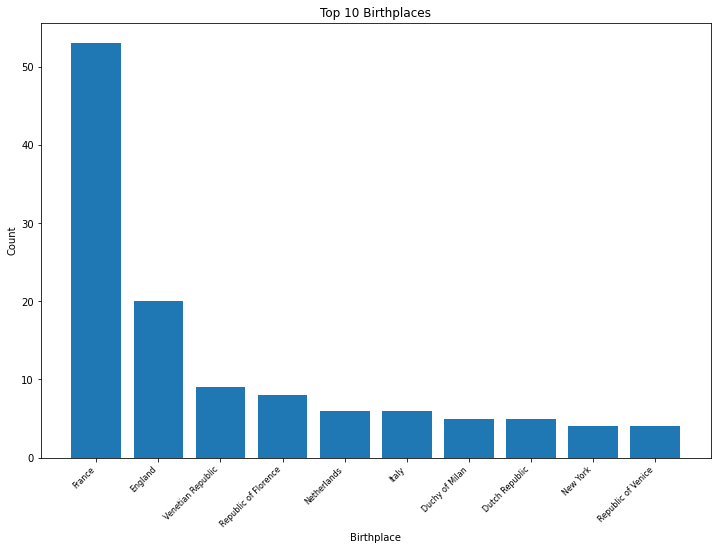

In [28]:
# Select the top 10 artists_places['name'] with the most artists
top_10 = artists_places['name'].value_counts().head(10)
# Plot the top 10 artists_places['name'] with the most artists
plt.figure(figsize=(12,8))
plt.bar(top_10.index, top_10.values)
plt.title('Top 10 Birthplaces')
plt.xlabel('Birthplace')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.show()

In [67]:
specialization = pd.read_parquet('https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/data/Specialization.parquet.gzip')
specialization.head(2)

,id,name,description
0,0,Still Life,A still life (plural: still lifes) is a work o...
1,1,Portraits,"A portrait is a painting, photograph, sculptur..."


In [68]:
artists_specialization = pd.read_csv('https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/data/ArtistSpecializations.csv')
artists_specialization.head(2)

,artist_id,specialty_id
0,0.0,0.0
1,0.0,1.0


In [69]:
# Join artists and artists_specialization and then join with specialization
artists_specialization = pd.merge(artists, artists_specialization, left_on='id', right_on='artist_id', how='left')
artists_specialization.head(2)

,id,name,url,summary,picture,birthplace,deathplace,birthdate,deathdate,cause_of_death,artist_id,specialty_id
0,0,Vincent Van Gogh,http://wikigallery.org/wiki/artist36933/Vincen...,Vincent Willem van Gogh (Dutch: [ˈvɪnsɛnt ˈʋɪl...,0.0,0.0,342.0,1853-03-30,1890-07-29,Gunshot wound,0.0,0.0
1,0,Vincent Van Gogh,http://wikigallery.org/wiki/artist36933/Vincen...,Vincent Willem van Gogh (Dutch: [ˈvɪnsɛnt ˈʋɪl...,0.0,0.0,342.0,1853-03-30,1890-07-29,Gunshot wound,0.0,1.0


In [71]:
# merge artists_specialization with specialization with name 'specialization_name'
artists_specialization = pd.merge(artists_specialization, specialization, left_on='specialty_id', right_on='id', how='left')
artists_specialization.head(2)

,id_x,name_x,url,summary,picture,birthplace,deathplace,birthdate,deathdate,cause_of_death,artist_id,specialty_id,id_y,name_y,description
0,0,Vincent Van Gogh,http://wikigallery.org/wiki/artist36933/Vincen...,Vincent Willem van Gogh (Dutch: [ˈvɪnsɛnt ˈʋɪl...,0.0,0.0,342.0,1853-03-30,1890-07-29,Gunshot wound,0.0,0.0,0.0,Still Life,A still life (plural: still lifes) is a work o...
1,0,Vincent Van Gogh,http://wikigallery.org/wiki/artist36933/Vincen...,Vincent Willem van Gogh (Dutch: [ˈvɪnsɛnt ˈʋɪl...,0.0,0.0,342.0,1853-03-30,1890-07-29,Gunshot wound,0.0,1.0,1.0,Portraits,"A portrait is a painting, photograph, sculptur..."


In [72]:
artists_specialization['name_y']
# change second coullumn name called 'name_y' to 'specialization_name'
artists_specialization.rename(columns={'name_y': 'specialization_name'}, inplace=True)

In [75]:
artists_specialization[['name_x', 'specialization_name']].head(5)

,name_x,specialization_name
0,Vincent Van Gogh,Still Life
1,Vincent Van Gogh,Portraits
2,Vincent Van Gogh,Painting
3,Vincent Van Gogh,Landscapes
4,Pierre Auguste Renoir,Painting


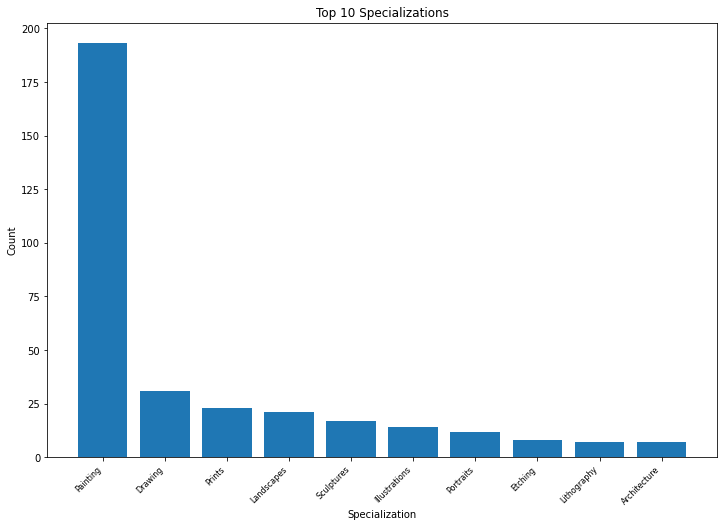

In [76]:
# Select the top 10 artists_specialization['specialization_name'] with the most artists
top_10 = artists_specialization['specialization_name'].value_counts().head(10)
# Plot the top 10 artists_specialization['specialization_name'] with the most artists
plt.figure(figsize=(12,8))
plt.bar(top_10.index, top_10.values)
plt.title('Top 10 Specializations')
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.show()

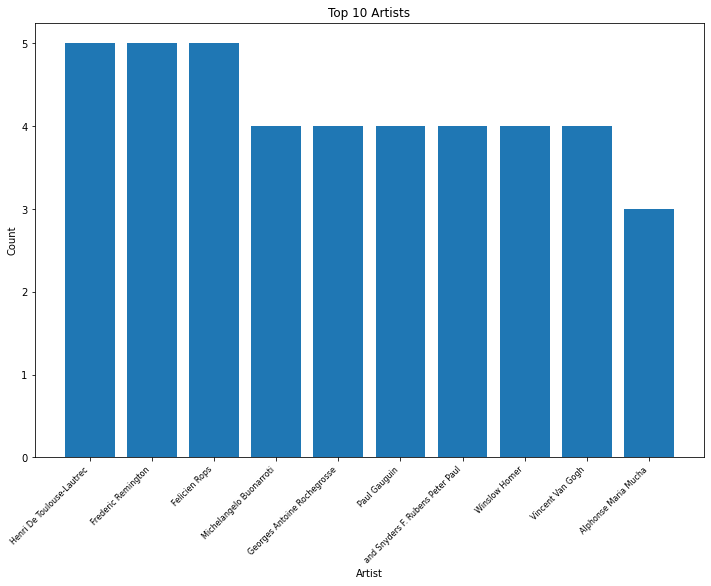

In [77]:
# Select the top 10 artists_specialization['name_x'] with the most specializations
top_10 = artists_specialization['name_x'].value_counts().head(10)
# Plot the top 10 artists_specialization['name_x'] with the most specializations
plt.figure(figsize=(12,8))
plt.bar(top_10.index, top_10.values)
plt.title('Top 10 Artists')
plt.xlabel('Artist')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.show()